<a href="https://colab.research.google.com/github/omajipawar/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition_(Omaji_Pawar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge. In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

Scope of project

* A. Model should be able to identify students’ emotions using minimum reference images.
* B. Model should work on the real-time webcam video feed.
* C. Model must be deployed on AWS/GCP/Azure platform as an end-to-end solution.
* D. Model must be accessible via a web application (Streamlit) for demo purposes.

In [1]:
#Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

#Importing deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import layers
from keras.layers import Input,Dropout,MaxPooling2D, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, Dense, BatchNormalization
from keras.models import Model, Sequential
from keras import models
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
#Unzipping the data
!unzip '/content/archive (3).zip' -d "/content/New folder"

In [3]:
#Training and test Data path
train_data_path = '/content/New folder/images/images/train'
test_data_path = '/content/New folder/images/images/validation'

In [4]:
#Creating dictionary for emotion
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
# creating a list of emotions
emotion = list(emotions.values())
emotion

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

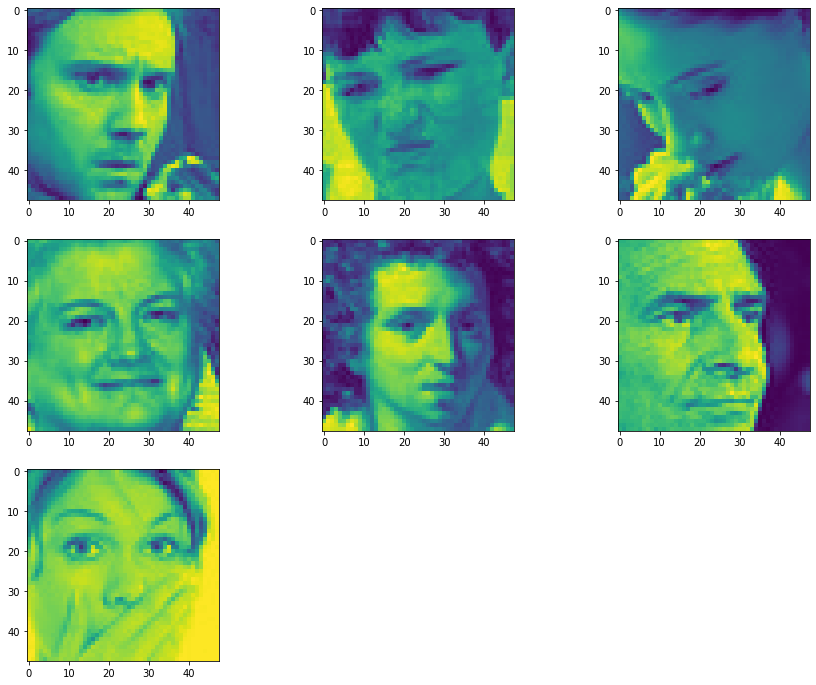

In [5]:
#Plotting images of each category of emotion
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
img1 = mpimg.imread('/content/New folder/images/images/train/angry/0.jpg')
plt.imshow(img1)
plt.subplot(3,3,2)
img2 = mpimg.imread('/content/New folder/images/images/train/disgust/10018.jpg') 
plt.imshow(img2)
plt.subplot(3,3,3)
img3 = mpimg.imread('/content/New folder/images/images/train/fear/10010.jpg')
plt.imshow(img3)
plt.subplot(3,3,4)
img4 = mpimg.imread('/content/New folder/images/images/train/happy/100.jpg')
plt.imshow(img4)
plt.subplot(3,3,5)
img5 = mpimg.imread('/content/New folder/images/images/train/neutral/1000.jpg')
plt.imshow(img5)
plt.subplot(3,3,6)
img6 = mpimg.imread('/content/New folder/images/images/train/sad/10006.jpg')
plt.imshow(img6)
plt.subplot(3,3,7)
img7 = mpimg.imread('/content/New folder/images/images/train/surprise/10007.jpg')
plt.imshow(img7)

In [16]:
#Data preprocessing
picture_size = 48
batch_size = 128
train_gen = ImageDataGenerator( zoom_range = 0.2, 
                               shear_range = 0.2, 
                               rotation_range=45,
                               horizontal_flip=True,
                               vertical_flip=True, 
                               rescale = 1./255)

test_gen = ImageDataGenerator(rescale = 1./255 )

train_data = train_gen.flow_from_directory(directory= train_data_path, 
                                                       target_size=(picture_size,picture_size),
                                                       color_mode='grayscale',
                                                       batch_size=batch_size,
                                                       class_mode='categorical',
                                                       shuffle= True)

test_data = test_gen.flow_from_directory(directory = test_data_path,
                                                   target_size=(picture_size,picture_size),
                                                   color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle= False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### Building a CNN model

In [21]:
no_of_classes = 7
#Creating a object of cnn model
cnn = keras.models.Sequential()

#1st Convulution layer
cnn.add(Conv2D(32,kernel_size = (3,3),input_shape= (48,48,1)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

# 2nd Convolution layer
cnn.add(Conv2D(64,(3,3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))


#3rd Convolution layer
cnn.add(Conv2D(512,(4,4), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.35))

#4th conolution layer
#3rd Convolution layer
cnn.add(Conv2D(256,(4,4), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.35))

# Flattening
cnn.add(Flatten())

# Fully connected layer 1st layer
cnn.add(Dense(256))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

# Fully connected layer 2nd layer
cnn.add(Dense(512))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

#Output layer
cnn.add(Dense(no_of_classes, activation='softmax'))

In [28]:
#Compling the model
cnn.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy', metrics='accuracy')

In [29]:
#Summary of cnn model
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 activation_12 (Activation)  (None, 15, 15, 32)        0         
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 64)       

In [30]:
#Training the model
cnn.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
226/226 [==============================] - 24s 95ms/step - loss: 0.8937 - accuracy: 0.6695 - val_loss: 1.0136 - val_accuracy: 0.6463
Epoch 2/5
226/226 [==============================] - 21s 92ms/step - loss: 0.8912 - accuracy: 0.6673 - val_loss: 1.0126 - val_accuracy: 0.6361
Epoch 3/5
226/226 [==============================] - 20s 90ms/step - loss: 0.8791 - accuracy: 0.6722 - val_loss: 1.0661 - val_accuracy: 0.6279
Epoch 4/5
226/226 [==============================] - 20s 90ms/step - loss: 0.8884 - accuracy: 0.6686 - val_loss: 1.1183 - val_accuracy: 0.5978
Epoch 5/5
226/226 [==============================] - 20s 90ms/step - loss: 0.8854 - accuracy: 0.6704 - val_loss: 0.9953 - val_accuracy: 0.6451
